In [73]:
! pip install -r requirements.txt

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as data
import sklearn as sk
from sklearn.preprocessing import MaxAbsScaler
import yfinance as yf

In [24]:
symbol = 'SBIN.NS'
ticker = yf.Ticker(symbol)

In [25]:
stock = ticker.history(start ='2019-01-01', end ='2020-01-01')

In [26]:
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-01 00:00:00+05:30,290.248787,293.370802,286.687757,292.297607,11837127,0.0,0.0
2019-01-02 00:00:00+05:30,291.809779,295.126902,285.956022,286.736511,25559853,0.0,0.0
2019-01-03 00:00:00+05:30,287.809727,288.346310,283.029165,284.004791,17548347,0.0,0.0
2019-01-04 00:00:00+05:30,284.980398,291.712212,284.395016,290.395111,19514041,0.0,0.0
2019-01-07 00:00:00+05:30,293.712258,294.151302,288.004868,289.078033,14579399,0.0,0.0
...,...,...,...,...,...,...,...
2019-12-24 00:00:00+05:30,325.078653,326.054279,321.176148,323.371307,21747782,0.0,0.0
2019-12-26 00:00:00+05:30,324.883519,325.322563,320.102957,321.810303,24616942,0.0,0.0
2019-12-27 00:00:00+05:30,325.273771,330.103133,324.883526,329.029938,33477173,0.0,0.0


In [27]:
stock.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-24 00:00:00+05:30,325.078653,326.054279,321.176148,323.371307,21747782,0.0,0.0
2019-12-26 00:00:00+05:30,324.883519,325.322563,320.102957,321.810303,24616942,0.0,0.0
2019-12-27 00:00:00+05:30,325.273771,330.103133,324.883526,329.029938,33477173,0.0,0.0
2019-12-30 00:00:00+05:30,329.517743,329.615312,324.395706,326.249390,22775554,0.0,0.0
2019-12-31 00:00:00+05:30,326.249385,328.151868,324.444471,325.615234,23801635,0.0,0.0


In [28]:
stock = stock.reset_index()
stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-01-01 00:00:00+05:30,290.248787,293.370802,286.687757,292.297607,11837127,0.0,0.0
1,2019-01-02 00:00:00+05:30,291.809779,295.126902,285.956022,286.736511,25559853,0.0,0.0
2,2019-01-03 00:00:00+05:30,287.809727,288.346310,283.029165,284.004791,17548347,0.0,0.0
3,2019-01-04 00:00:00+05:30,284.980398,291.712212,284.395016,290.395111,19514041,0.0,0.0
4,2019-01-07 00:00:00+05:30,293.712258,294.151302,288.004868,289.078033,14579399,0.0,0.0


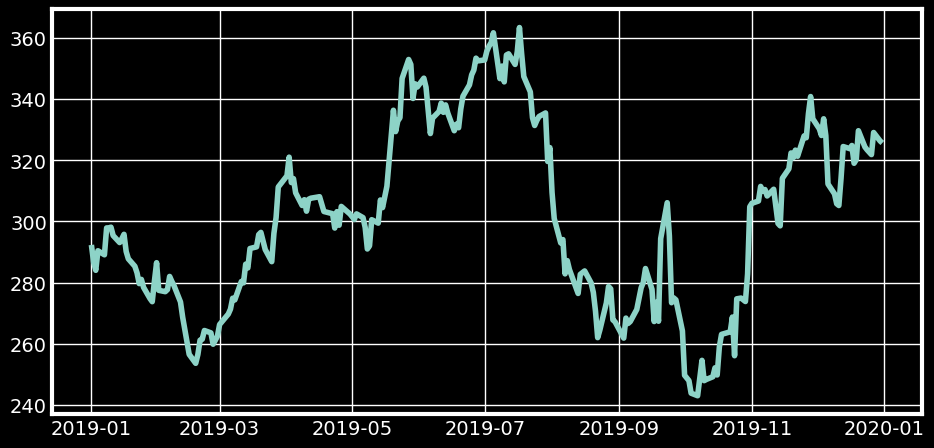

In [34]:
plt.plot(stock['Date'], stock['Close'])
plt.show()

In [35]:
ma100 = stock.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
238    291.819065
239    291.694673
240    291.630770
241    291.697600
242    291.712722
Name: Close, Length: 243, dtype: float64

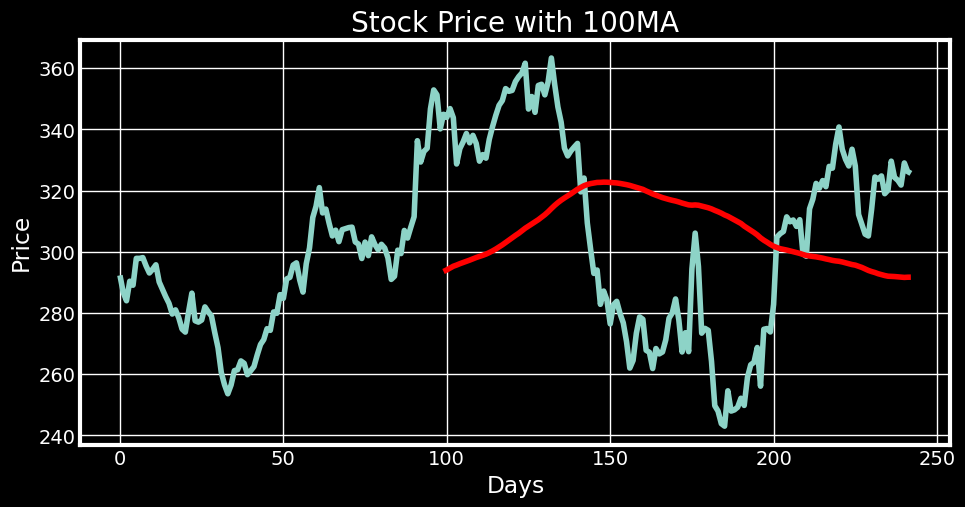

In [38]:
plt.plot(stock.Close)
plt.plot(ma100,'r')
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Stock Price with 100MA")
plt.show()

In [39]:
ma200 = stock.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
238    305.387341
239    305.697102
240    306.036620
241    306.355406
242    306.651996
Name: Close, Length: 243, dtype: float64

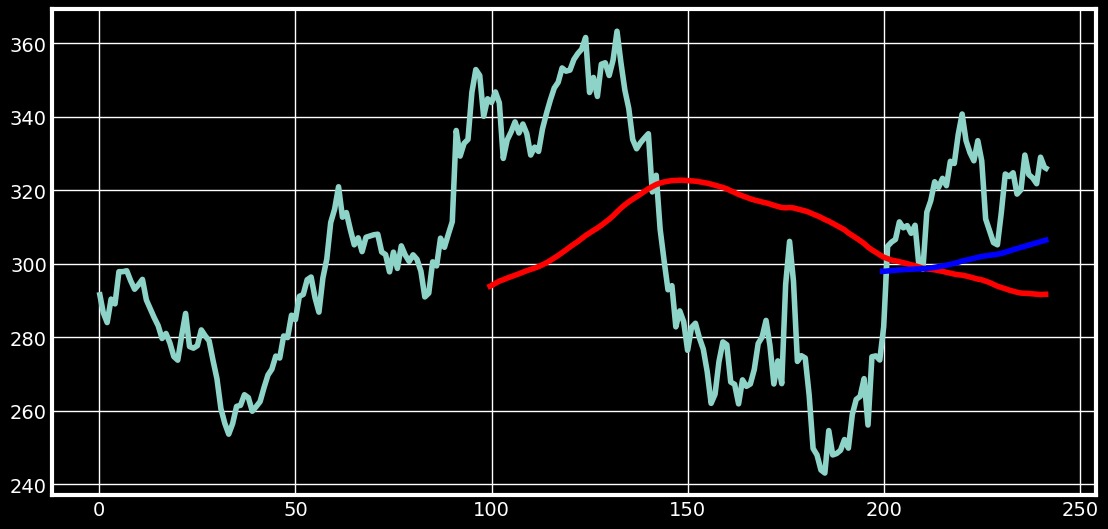

In [42]:
plt.figure(figsize = (12,6))
plt.plot(stock.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'b')

In [43]:
stock.shape

(243, 8)

In [44]:
#splitting data into training and testing
data_train = pd.DataFrame(stock['Close'][0:int(len(stock)*0.70)])
data_test = pd.DataFrame(stock['Close'][int(len(stock)*0.70):int(len(stock))])



print(data_train.shape)
print(data_test.shape)

(170, 1)
(73, 1)


In [45]:
data_train.head()

,Close
0,292.297607
1,286.736511
2,284.004791
3,290.395111
4,289.078033


In [46]:
data_test.head()

,Close
170,284.590179
171,277.760803
172,267.272827
173,273.565582
174,267.370331


In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


In [48]:
data_train_array = scaler.fit_transform(data_train)
data_train_array

array([[0.35260111],
       [0.30191165],
       [0.277012  ],
       [0.33525983],
       [0.32325466],
       [0.40329   ],
       [0.40329   ],
       [0.4055134 ],
       [0.38061347],
       [0.35971553],
       [0.37083141],
       [0.38417068],
       [0.33303671],
       [0.31124948],
       [0.28901745],
       [0.26945306],
       [0.2374387 ],
       [0.24988866],
       [0.22632254],
       [0.19253013],
       [0.1836371 ],
       [0.24455312],
       [0.29968854],
       [0.21742979],
       [0.21342834],
       [0.21965291],
       [0.2587817 ],
       [0.24410833],
       [0.23165836],
       [0.18274779],
       [0.13739444],
       [0.06358366],
       [0.02667854],
       [0.        ],
       [0.02623375],
       [0.06891948],
       [0.07158739],
       [0.09782114],
       [0.09070671],
       [0.0569143 ],
       [0.06847468],
       [0.08092465],
       [0.11560693],
       [0.14673198],
       [0.16140507],
       [0.19386367],
       [0.18897292],
       [0.243

In [49]:
data_train_array.shape

(170, 1)

In [50]:
x_train =[]
y_train =[]

for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i-100: i])
    y_train.append(data_train_array[i, 0])
    
x_train, y_train =np.array(x_train), np.array(y_train)   
    

In [51]:
x_train.shape

(70, 100, 1)

In [ ]:
#ML Model

In [52]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [53]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [55]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
3/3 [==============================] - 5s 192ms/step - loss: 0.4221
Epoch 2/50
3/3 [==============================] - 1s 196ms/step - loss: 0.3223
Epoch 3/50
3/3 [==============================] - 1s 180ms/step - loss: 0.1691
Epoch 4/50
3/3 [==============================] - 1s 186ms/step - loss: 0.1141
Epoch 5/50
3/3 [==============================] - 1s 185ms/step - loss: 0.1138
Epoch 6/50
3/3 [==============================] - 1s 195ms/step - loss: 0.1131
Epoch 7/50
3/3 [==============================] - 1s 185ms/step - loss: 0.0923
Epoch 8/50
3/3 [==============================] - 1s 184ms/step - loss: 0.0971
Epoch 9/50
3/3 [==============================] - 1s 182ms/step - loss: 0.0851
Epoch 10/50
3/3 [==============================] - 1s 207ms/step - loss: 0.0816
Epoch 11/50
3/3 [==============================] - 1s 191ms/step - loss: 0.0919
Epoch 12/50
3/3 [==============================] - 1s 197ms/step - loss: 0.0833
Epoch 13/50
3/3 [==============================] 

In [56]:
model.save('keras_model.h5')

In [57]:
data_test.head()

,Close
170,284.590179
171,277.760803
172,267.272827
173,273.565582
174,267.370331


In [ ]:
#data_train.tail(100)

In [58]:
past_100_days = data_train.tail(100)

In [59]:

final_stock = pd.concat([past_100_days, data_test]) ['Close']


In [60]:
final_stock.head()

70    307.907623
71    308.053955
72    303.224609
73    302.492889
74    297.809875
Name: Close, dtype: float64

In [61]:
import numpy as np
final_stock = np.array(final_stock).reshape(-1,1)
input_data = scaler.fit_transform(final_stock)
input_data


array([[0.53933492],
       [0.54055136],
       [0.5004054 ],
       [0.49432267],
       [0.45539315],
       [0.5       ],
       [0.46309823],
       [0.51419295],
       [0.49351187],
       [0.47891302],
       [0.49391727],
       [0.4837793 ],
       [0.4570155 ],
       [0.39862109],
       [0.40713671],
       [0.47810222],
       [0.46877531],
       [0.53163009],
       [0.51094876],
       [0.54055136],
       [0.56893752],
       [0.77534466],
       [0.71735616],
       [0.74614771],
       [0.75506898],
       [0.86171957],
       [0.9132202 ],
       [0.89983779],
       [0.80738041],
       [0.84712072],
       [0.8386051 ],
       [0.86253062],
       [0.83779405],
       [0.71208423],
       [0.75385229],
       [0.77210047],
       [0.79480955],
       [0.76966758],
       [0.78994326],
       [0.76804549],
       [0.71978931],
       [0.73763184],
       [0.72789953],
       [0.77899425],
       [0.81346313],
       [0.84428243],
       [0.87145189],
       [0.884

In [62]:
input_data.shape

(173, 1)

In [63]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [64]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(73, 100, 1)
(73,)


In [65]:
#Making Predictions

y_predicted = model.predict(x_test)

3/3 [==============================] - 1s 64ms/step


In [66]:
y_predicted.shape

(73, 1)

In [67]:
y_test

array([0.34549888, 0.28872682, 0.20154112, 0.25385229, 0.20235166,
       0.42660185, 0.52433092, 0.43390102, 0.25263584, 0.26561235,
       0.26034067, 0.17599325, 0.05555536, 0.04095676, 0.00689365,
       0.        , 0.0961071 , 0.04095676, 0.04420095, 0.05150025,
       0.07583129, 0.05636641, 0.13260335, 0.16666658, 0.17356036,
       0.21370632, 0.10867783, 0.26317895, 0.2652067 , 0.25587978,
       0.33090028, 0.5133819 , 0.52270857, 0.52879155, 0.56853212,
       0.55514996, 0.56001625, 0.54257911, 0.56082729, 0.46796426,
       0.46147613, 0.59042989, 0.61638291, 0.65936741, 0.64639065,
       0.66707249, 0.65044614, 0.70559635, 0.70073007, 0.766018  ,
       0.81265209, 0.75223044, 0.72506073, 0.70681255, 0.75223044,
       0.70640715, 0.57502024, 0.54825644, 0.52149238, 0.51662609,
       0.5900245 , 0.6768043 , 0.67112747, 0.67964309, 0.6313869 ,
       0.64111922, 0.71978931, 0.6755881 , 0.66788328, 0.65490677,
       0.71492302, 0.69180855, 0.68653687])

In [68]:
y_predicted

array([[0.15106928],
       [0.1594037 ],
       [0.17102723],
       [0.18532869],
       [0.20160912],
       [0.2188517 ],
       [0.23713674],
       [0.25727233],
       [0.27972797],
       [0.30351773],
       [0.32726038],
       [0.34958884],
       [0.36889318],
       [0.3832174 ],
       [0.39104143],
       [0.391506  ],
       [0.3845993 ],
       [0.37139782],
       [0.3532926 ],
       [0.33210108],
       [0.30947486],
       [0.28679678],
       [0.26516786],
       [0.2454202 ],
       [0.22811218],
       [0.21358193],
       [0.2020909 ],
       [0.19359338],
       [0.18850693],
       [0.18726571],
       [0.19009487],
       [0.19720787],
       [0.2092786 ],
       [0.22688498],
       [0.25027844],
       [0.27925757],
       [0.31304514],
       [0.35047528],
       [0.39018023],
       [0.43081436],
       [0.47058174],
       [0.5077551 ],
       [0.5417416 ],
       [0.57255864],
       [0.60065943],
       [0.626438  ],
       [0.65026546],
       [0.672

In [69]:
scaler.scale_

array([0.00831292])

In [70]:
scale_factor = 1/0.00257832
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

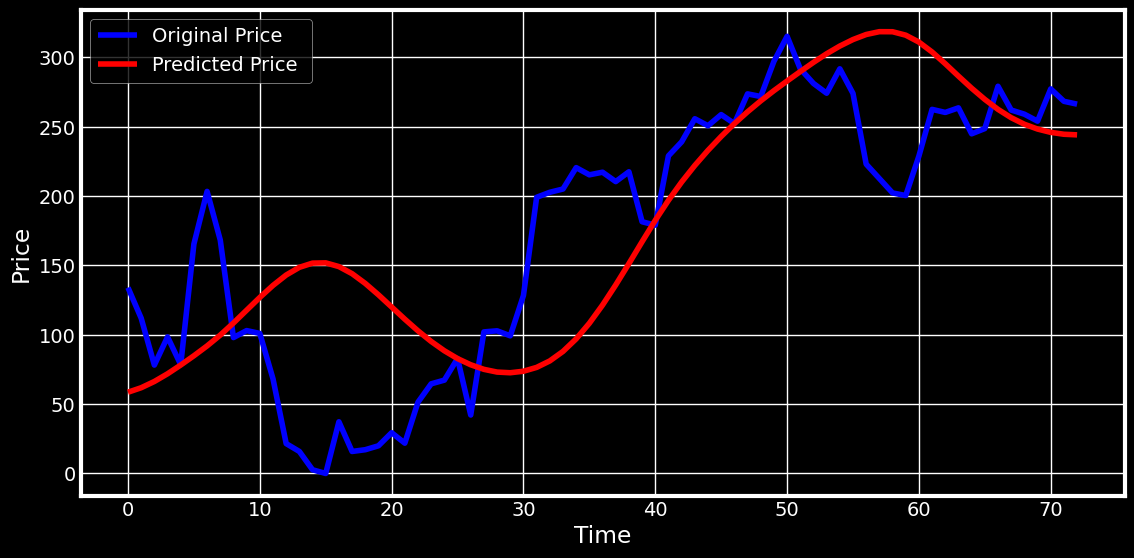

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price ')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()